In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score
import sklearn.metrics as m

In [2]:
emotion_table = {'neutral'  : 0, 
                 'happiness': 1, 
                 'surprise' : 2, 
                 'sadness'  : 3, 
                 'anger'    : 4, 
                 'disgust'  : 5, 
                 'fear'     : 6, 
                 'contempt' : 7}

emotion_labels = sorted(emotion_table, key=emotion_table.get)
emotion_values = sorted(emotion_table.values())


num_classes = len(emotion_table)

In [3]:
## parametros
model_name='VGG13'

base_folder = 'data'

training_mode, best_epoch = ("majority",80)
# training_mode, best_epoch = ("probability",78)
# training_mode, best_epoch = ("crossentropy",98)
# training_mode, best_epoch = ("multi_target",89)
# tmbe = [("majority",80), ("probability",78), ("crossentropy",98), ("multi_target",89)]

In [4]:
## folders tests
output_test_path   = os.path.join(base_folder, R'tests')
output_test_folder = os.path.join(output_test_path, model_name + '_' + training_mode)

if not os.path.exists(output_test_folder):
    os.makedirs(output_test_folder)

In [5]:
print(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))
data = np.load(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))
y_pred = data['y_pred']
y_true = data['y_true']

data/tests/VGG13_majority/test_80.npz


In [6]:
m.accuracy_score(y_true, y_pred)

0.8575071724577622

In [28]:
# Calcular a acurácia para cada label
accuracies = []

for target in range(len(emotion_labels)):
    target_indices = np.where(y_true.argmax(axis=1) == target)[0]
    y_true_target = y_true[target_indices]
    y_pred_target = y_pred[target_indices]
    accuracy = m.accuracy_score(y_true_target, y_pred_target)
    accuracies.append(accuracy)

# Imprimir as acurácias por label
for i, target_name in enumerate(emotion_labels):
    print(f"Acurácia para {target_name}: {accuracies[i]:.2f}")

Acurácia para neutral: 0.91
Acurácia para happiness: 0.94
Acurácia para surprise: 0.88
Acurácia para sadness: 0.67
Acurácia para anger: 0.83
Acurácia para disgust: 0.25
Acurácia para fear: 0.43
Acurácia para contempt: 0.07


In [8]:
m.cohen_kappa_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), labels=emotion_values)

0.8108128345795702

In [27]:
print(m.classification_report(y_true, y_pred, target_names=emotion_labels))

              precision    recall  f1-score   support

     neutral       0.84      0.91      0.87      1083
   happiness       0.93      0.94      0.93       892
    surprise       0.85      0.88      0.87       394
     sadness       0.78      0.67      0.72       382
       anger       0.81      0.83      0.82       269
     disgust       0.50      0.25      0.33        16
        fear       0.76      0.43      0.55        86
    contempt       0.50      0.07      0.12        15

   micro avg       0.86      0.86      0.86      3137
   macro avg       0.75      0.62      0.65      3137
weighted avg       0.85      0.86      0.85      3137
 samples avg       0.86      0.86      0.86      3137



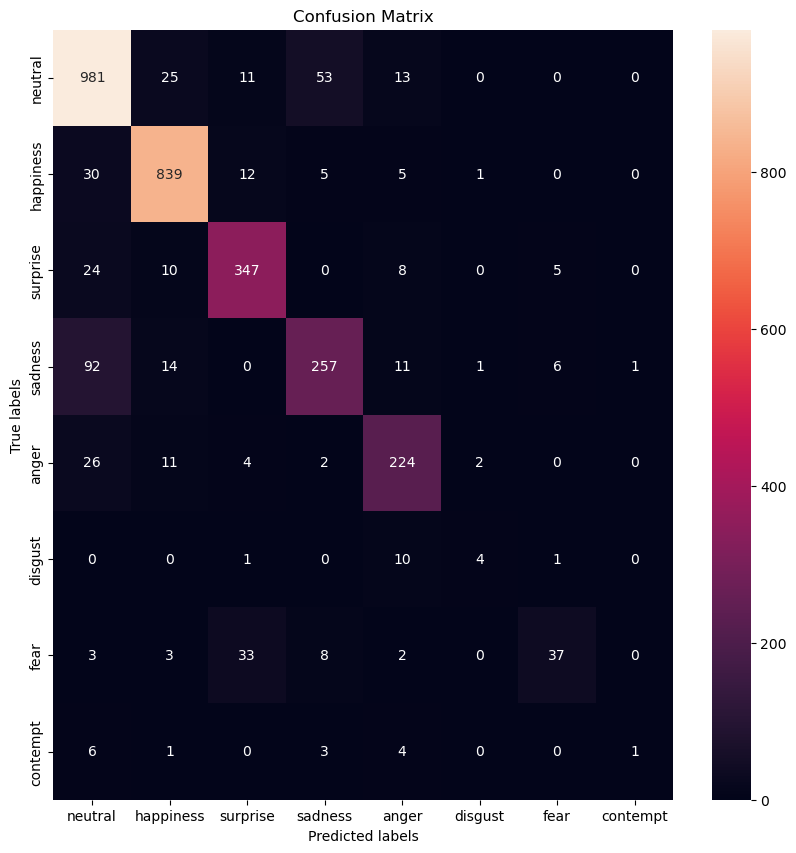

In [9]:
# ax= plt.subplot()

fig, ax = plt.subplots(figsize=(10, 10))

cm = m.confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(emotion_labels)
ax.yaxis.set_ticklabels(emotion_labels)

plt.show()

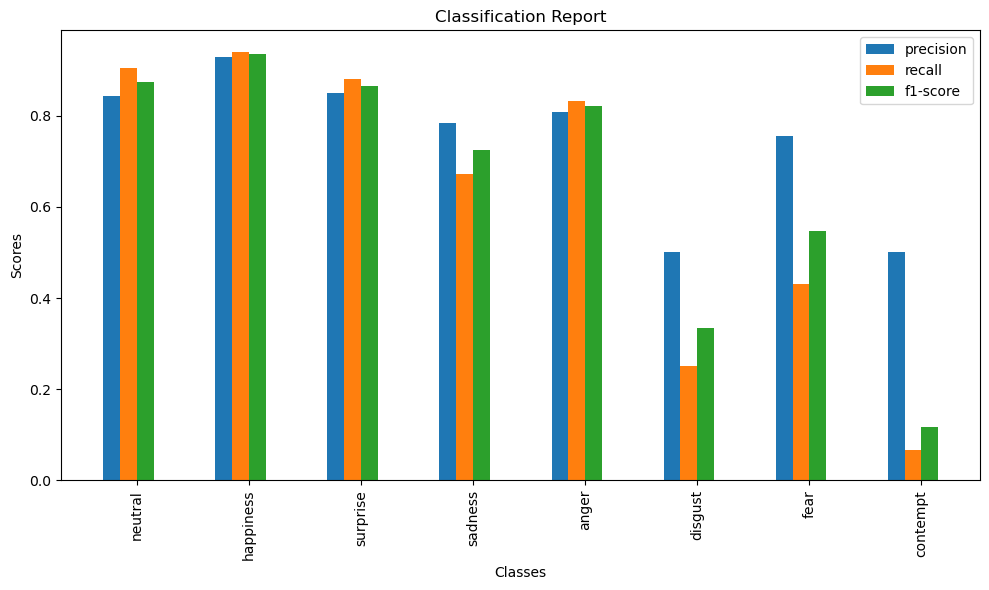

In [12]:
report_dict = m.classification_report(y_true, y_pred, target_names=emotion_labels, output_dict=True)


# Obter as métricas para cada classe
metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(emotion_labels), len(metrics)))

for i, target in enumerate(emotion_labels):
    for j, metric in enumerate(metrics):
        values[i, j] = report_dict[target][metric]

# Criar a figura de barras agrupadas
fig, ax = plt.subplots(figsize=(10, 6))

# Configurar as posições das barras
bar_width = 0.15
index = np.arange(len(emotion_labels))

# Plotar as barras para cada métrica
for i in range(len(metrics)):
    ax.bar(index + (i * bar_width), values[:, i], bar_width, label=metrics[i])

# Adicionar rótulos aos eixos
ax.set_xticks(index + bar_width * 1.5)
ax.set_xticklabels(emotion_labels, rotation=90)
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Classification Report')

# Adicionar uma legenda
ax.legend()

# Ajustar o layout
plt.tight_layout()

# Exibir a figura
# plt.savefig('classification_report.png')
plt.show()